## Demo

In [35]:
!pip install wfdb
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
import os
import pickle

## Run training (main.py) with input arguments (yaml file) 

In [36]:
%run main.py noisy_scale3_1epoch.yaml

data<utils.obj object at 0x0000018DEE6339D0>
Loading validation: ('val_X_smoke.npy', 'val_Y_smoke.npy')
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000, 1)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 1000, 128)         33792     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1000, 128)         98816     
_________________________________________________________________
dense (Dense)                (None, 1000, 1)           129       
Total params: 132,737
Trainable params: 132,737
Non-trainable params: 0
_________________________________________________________________
20/20 [==============================] - 23s 978ms/step - loss: 0.5430 - auc: 0.6476 - auc_1: 0.0808 - recall: 0.1471 - precision: 0.1115 - val_loss:

## Plot some metric from saved history files

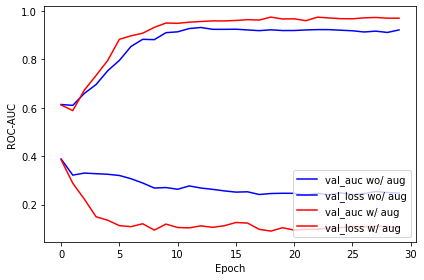

In [37]:
def load_pickle(fullpath):
  with open(fullpath, 'rb') as handle:
      return pickle.load(handle)  

def load_history(filename):
    h = load_pickle(os.path.join(os.getcwd(),'io', 'histories', filename))
    h = sorted(h.items())
    return h  

#main.py in saves history files as pickle after training
h1 = load_history('noisy_scale1.pickle') 
h2 = load_history('aug_scale1.pickle') 

plt.figure()
plt.plot(h1[5][1], 'b', label = str(h1[5][0] + ' wo/ aug' )) 
plt.plot(h1[7][1], 'b', label = str(h1[7][0] + ' wo/ aug')) 
plt.plot(h2[5][1], 'r', label = str(h1[5][0] + ' w/ aug' )) 
plt.plot(h2[7][1], 'r', label = str(h1[7][0] + ' w/ aug')) 
plt.legend(loc = 'lower right')
plt.xlabel('Epoch')
plt.ylabel('ROC-AUC')

plt.tight_layout()

## Import test data and models

In [38]:
model_path = os.path.join(os.getcwd(),'io','neuralnet_models')
model1 = 'noisy_scale1.h5'
model2 = 'aug_scale1.h5'
model1 = load_model(os.path.join(model_path, model1))
model2 = load_model(os.path.join(model_path, model2))

testdata_path = os.path.join(os.getcwd(),'io','realdata')
X_test = 'val_X_smoke.npy'
Y_test = 'val_Y_smoke.npy'

X = np.load(os.path.join(testdata_path, X_test))
Y = np.load(os.path.join(testdata_path, Y_test))

print(X.shape)

(100, 1000, 1)


In [39]:
yhat1 = model1.predict(X)
yhat2 = model2.predict(X)

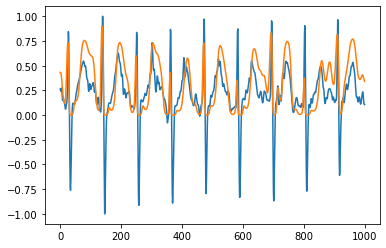

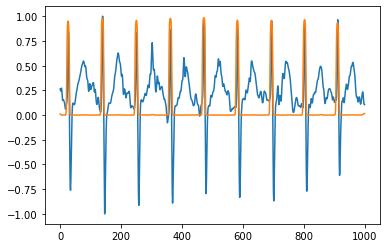

In [40]:
sig = 9
X[sig]
plt.figure()
plt.plot(X[sig])
plt.plot(yhat1[sig])

plt.figure()
plt.plot(X[sig])
plt.plot(yhat2[sig])


## Generate and plot a synthetic signal

In [41]:
from syntmodel.synt_gen import model
from syntmodel.utils_model import Prms 
from utils import bpf

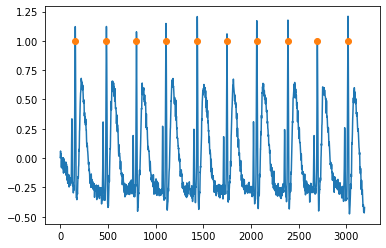

In [42]:
prms = Prms()
prms.scale_limits(3,3,3,0.1)
prms.randomize()
fs = 250
n = 10
ecg_clean, noise_stream, (_,_,r_inds,_,_) = model(n, prms, fs)
plt.plot(bpf(ecg_clean + noise_stream,fs=fs))
plt.plot(r_inds, np.ones(len(r_inds)),'o')